In [101]:
import pandas as pd
from pathlib import Path

DATA_ROOT = Path("/Users/jakobschneider/Machine Learning/Data_LCC")
PATH = DATA_ROOT / "model_table_imo_2024.parquet"

df = pd.read_parquet(PATH)

# --- Quality filter ---
df_valid = df[df["quality_ok"] == True].copy()

In [105]:
df_valid["y_co2_per_nm_kg"].head(50)

5      201.22
6      202.86
7      191.72
8      212.67
9      359.90
13     647.15
16     178.95
18     364.78
19     514.48
21     460.88
24     279.61
25     319.38
26     560.18
29     711.81
30     324.22
31     311.80
32     506.87
33     457.01
34     366.62
35     238.33
37     280.98
38     235.05
39     868.85
41     116.81
43     247.76
45     281.19
46     271.04
48     238.74
49     242.31
57     262.69
59     313.69
61     434.28
65     274.77
66     240.67
67     245.98
68     272.02
69     273.00
71     266.39
73     175.79
74     226.47
82     807.65
83     278.73
84     274.56
87     601.59
93     190.00
94     216.50
96     643.73
97     584.56
98     713.81
100    447.61
Name: y_co2_per_nm_kg, dtype: float64

In [102]:
y = df_valid["y_co2_per_nm_kg"].astype(str)

# explizit nur den bekannten MRV-Artefakt entfernen
df_valid = df_valid[y != "Division by zero!"].copy()

# danach harte numerische Konvertierung
df_valid["y_co2_per_nm_kg"] = pd.to_numeric(
    df_valid["y_co2_per_nm_kg"],
    errors="raise"
)

In [103]:
df_valid["y_co2_per_nm_kg"].head(50)

5      201.22
6      202.86
7      191.72
8      212.67
9      359.90
13     647.15
16     178.95
18     364.78
19     514.48
21     460.88
24     279.61
25     319.38
26     560.18
29     711.81
30     324.22
31     311.80
32     506.87
33     457.01
34     366.62
35     238.33
37     280.98
38     235.05
39     868.85
41     116.81
43     247.76
45     281.19
46     271.04
48     238.74
49     242.31
57     262.69
59     313.69
61     434.28
65     274.77
66     240.67
67     245.98
68     272.02
69     273.00
71     266.39
73     175.79
74     226.47
82     807.65
83     278.73
84     274.56
87     601.59
93     190.00
94     216.50
96     643.73
97     584.56
98     713.81
100    447.61
Name: y_co2_per_nm_kg, dtype: float64

In [106]:
# Ausreißer entfernen
# Inspect how many ships are affected
(df_valid["y_co2_per_nm_kg"] > 2000).value_counts()

# Hard plausibility cap
df_valid_plausible = df_valid[
    df_valid["y_co2_per_nm_kg"] <= 2000
].copy()

print("Remaining rows:", df_valid_plausible.shape[0])
print(df_valid_plausible["y_co2_per_nm_kg"].describe())

Remaining rows: 4474
count    4474.000000
mean      354.712423
std       194.770812
min        94.380000
25%       234.957500
50%       289.260000
75%       405.512500
max      1830.060000
Name: y_co2_per_nm_kg, dtype: float64


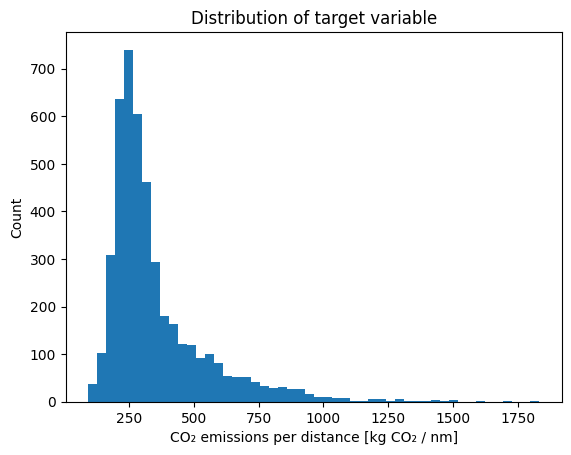

Target summary:
count    4474.000000
mean      354.712423
std       194.770812
min        94.380000
25%       234.957500
50%       289.260000
75%       405.512500
max      1830.060000
Name: y_co2_per_nm_kg, dtype: float64


In [107]:
import matplotlib.pyplot as plt
import numpy as np

y = df_valid_plausible["y_co2_per_nm_kg"]

plt.figure()
plt.hist(y, bins=50)
plt.xlabel("CO₂ emissions per distance [kg CO₂ / nm]")
plt.ylabel("Count")
plt.title("Distribution of target variable")
plt.show()

print("Target summary:")
print(y.describe())